## Regressione lineare con Python

Nei problemi di regressione si tenta di prevedere una variabile dipendente (solitamente indicata da Y) confrontandola con una serie di altre variabili (note come variabili indipendenti, solitamente indicate da X).

Esistono diversi tipi di regressione, a seconda del tipo di dati che si vuole prevedere. Tra i più diffusi abbiamo:

- Regressione Lineare: quando si vuole prevedere un valore continuo (ad esempio che temperatura sarà oggi?). Se la variabile di input è solo una allora la regressione lineare si dice semplice, altrimenti in caso contrario la regressione lineare si dice multipla.
- Regressione Logistica: quando si vuole prevedere in quale categoria si trova l’osservazione si sta trattando un problema di regressione logistica (si tratta di un gatto o di un cane?);
- Regressione di Poisson: quando si vuole prevedere un valore di conteggio che impatta il modello (ad esempio il numero di guasti informatici catastrofici in una grande azienda tecnologica in un anno di calendario).

## Scelta del dataset

Si è scelto un dataset di Kaggle che rappresenta [il meteo della città di Szeged](https://www.kaggle.com/budincsevity/szeged-weather), la terza città città ungherese per numero di abitanti dal 2006 al 2016.

Il set di dati contiene le informazioni meteorologiche di base come temperatura, velocità del vento, pressione e condizioni meteorologiche.

L'obiettivo del problema è tentare di capire se esiste una relazione di tipo lineare tra umidità e temperatura, dove la temperatura è la variabile dipendente (y) mentre l’umidità è la variabile indipendente (X).

Per verificare l’esistenza di questa relazione o meno creiamo un modello di regressione per prevedere i dati di temperatura dall’umidità.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Oltre a pandas, numpy, matplotlib e seaborn, importiamo alcune importanti classi e moduli di Sklearn:

- il LabelEncoder, per codificare i valori stringa in campi numerici;
- le metriche (R2, il coefficiente di correlazione) per valutare il modello di regressione lineare;
- il Train_test_split per suddividere la fase di addestramento con quella di test;
- il linear_model, il modulo che include i vari tipi di regressione.

## Importare il dataset

In [7]:
tempo = pd.read_csv('weatherHistory.csv')
tempo.shape

(96453, 12)

## Analizziamo il dataset

Quando si eseguono analisi su dataset è sempre opportuno verificare e preparare i dati per eliminare righe vuote o colonne prive di dati.

Si può notare che alcune colonne non contengono dati, come Loud Cover, e dovrebbero essere rimosse dal set di dati, tuttavia, poiché vengono usati solo dati di umidità e temperatura, la colonna non verrà eliminata.

Verifichiamo ora la presenza di celle nulle e se una riga qualsiasi contiene null, elimineremo la riga. Per farlo eseguiamo la seguente riga di codice:

In [8]:
tempo.isna().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [9]:
tempo=tempo.dropna()

## Verifica correlazione

Prima di creare il modello di regressione, è buona norma verificare la correlazione tra le variabili, magari facendoci aiutare da una mappa di calore che mostra le varie correlazioni come mostrato di seguito.

In [10]:
modeling_data=tempo.copy()
modeling_data=modeling_data.drop(['Daily Summary','Loud Cover'], axis=1)
le = LabelEncoder()
modeling_data['Summary']=le.fit(modeling_data['Summary']).transform(modeling_data['Summary'])
le2 = LabelEncoder()
modeling_data['Precip Type']=le2.fit(modeling_data['Precip Type']).transform(modeling_data['Precip Type'])

In questo script prima di tutto ci copiamo di dati nella variabile modeling_data. E in questo dataset copiato eliminiamo le colonne “Daily Summary” e “Loud Cover”.

Dopodichè trasformiamo, attraverso la classe Label Encoder, le colonne “Summary” e “Precip Type” da variabili stringa a variabili numeriche in modo da facilitare i calcoli al modello.

Il Label Encoder ci aiuterà a convertire questo tipo di dati di testo categoriali in dati numerici comprensibili al modello: tutto ciò che dobbiamo fare, per etichettare le colonne, è importare la classe LabelEncoder dalla libreria sklearn, adattare e trasformare le colonne, e quindi sostituire i dati di testo esistenti con i nuovi dati codificati.

Viene utilizzato il dataset copiato modeling_data. Esso ci crea l’array corr. Successivamente, viene creato un array di zeri con la stessa dimensione di quello appena creato, come prevede la funzione zeros_like di numpy, mentre con la funzione triu_indices_from troviamo gli indici dell’array del triangolo in alto necessari a creare la mappa di calore.

Anche le altre righe di codice servono per impostare la mappa di calore. Grazie alle librerie matplotlib e seaborn, si definisce la struttura e la forma del grafico.

Come risultato otteniamo il seguente grafico. Sia sull’asse x che sull’asse y abbiamo i campi del dataset copiato (modeling_data). I colori a forma di quadrato che si formano ci indicano il valore di correlazione tra le variabili in essere. In particolare:

- più ci si avvicina al verde più le variabili sono correlate tra loro,
- variabili con correlazione nulla avranno colore quasi vicino al bianco;
- variabili con correlazione inversa avranno colore tendente al rosa/porpora.

<AxesSubplot:>

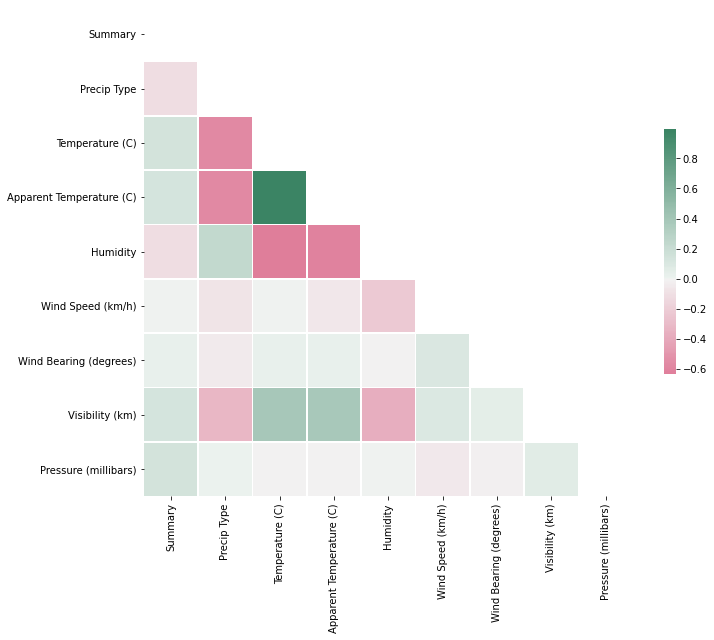

In [11]:
corr=modeling_data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(0,150,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

- I dati di temperatura e temperatura apparente hanno dati simili poiché la correlazione tra loro è elevata;
- I dati di pressione hanno una correlazione molto scarsa con i dati di temperatura e ciò può essere dovuto all’esistenza di righe con valore di pressione pari a zero;
- La temperatura e l’umidità hanno una correlazione inversa.

## Test train data

Prima di creare il modello cancelliamo anche le colonne “Apparent Temperature”, “Formatted Date” e “Summary” dal dataset. E consideriamo solo i valori della colonna “Humidity” che sono maggiori di zero.

In [12]:
modeling_data=modeling_data.drop(['Apparent Temperature (C)','Formatted Date','Summary'],axis=1)
modeling_data=modeling_data[modeling_data['Humidity']>0]

Una volta fatto ciò, possiamo provvedere a suddividere il dataset in set di dati di test e di allenamento. In questo caso consideriamo il 33% del set di dati come dato di test, mentre il 66% sarà il set di dati di addestramento.

In [13]:
X_train, X_test, y_train, y_test=train_test_split(modeling_data['Humidity'],modeling_data['Temperature (C)'], test_size=0.33, random_state=42)

## Modello di regressione

Siamo pronti per creare il modello di regressione. Eseguiamo il seguente script:

In [14]:
reg = linear_model.LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)
reg.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
reg.coef_

array([[-31.09051115]])

Assegniamo alla variabile reg il valore del modello di regressione. Eseguiamo poi l’adattamento del modello di regressione ai dati.

Col termine reg.coef invece stimiamo i coefficienti del problema di regressione. Vediamo poi stampati dalle successive righe di codice il coefficiente di determinazione R2 (la prima mi dice il coefficiente di determinazione relativo al dataset di addestramento, mentre la seconda il coefficiente previsto del dataset di test).

In [15]:
print('Coefficiente di determinazione del dataset di addestramento: '+str(reg.score(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))))
print('Coefficiente di determinazione del dataset di test: '+str(reg.score(X_test.values.reshape(-1,1),y_test.values.reshape(-1,1))))

Coefficiente di determinazione del dataset di addestramento: 0.40504986225298323
Coefficiente di determinazione del dataset di test: 0.40334341633001347


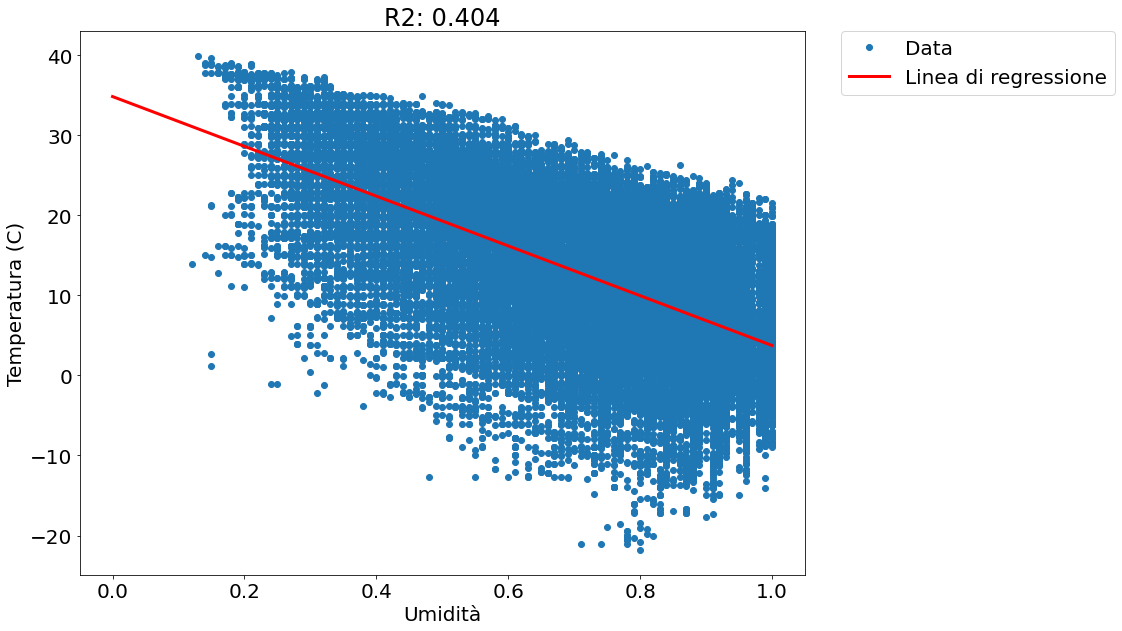

In [16]:
font={'size':20}
plt.rc('font',**font)
plt.figure(figsize=(13,10))
plt.plot(modeling_data['Humidity'], modeling_data['Temperature (C)'],'o',label='Data')
I=np.linspace(np.floor(min(modeling_data['Humidity'])*0.95),np.ceil(max(modeling_data['Humidity'])*0.11),50)
plt.plot(I,reg.predict(I.reshape(-1,1)),color='r',linewidth=3,label='Linea di regressione')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.xlabel('Umidità')
plt.ylabel('Temperatura (C)')
Preds=reg.predict(modeling_data['Humidity'].values.reshape(-1,1))
R2=r2_score(modeling_data['Temperature (C)'],Preds)
plt.title('R2: '+str(np.round(R2,decimals=3)))
plt.show()

Possiamo notare che il valore che otteniamo è un basso valore del coefficiente di correlazione (R2 = 0,404). Da ciò si può dedurre che l’umidità influenza poco la variabile temperatura.

Infine se volessimo calcolare il valore dei residui, ossia una stima osservabile dell’errore statistico, si può eseguire il seguente codice:

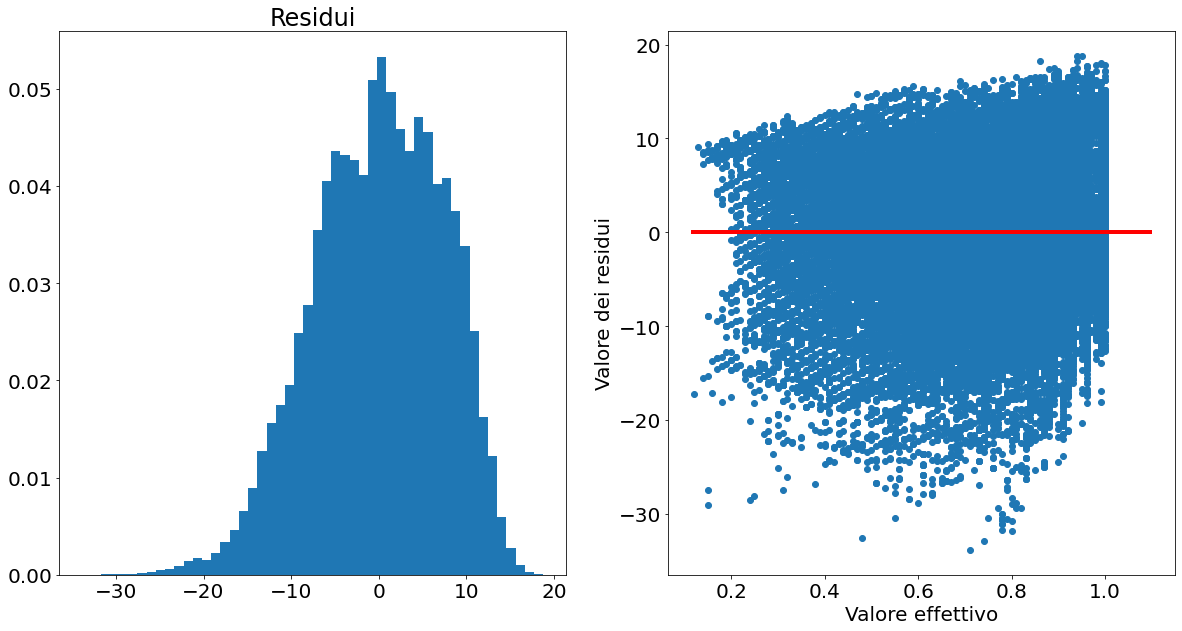

In [17]:
Residuals=modeling_data['Temperature (C)'].values.reshape(-1,1)-Preds
font={'size':20}
plt.rc('font',**font)
fig,ax=plt.subplots(1,2,figsize=(20,10))
num_bins=50
n,bins,patches=ax[0].hist(Residuals, num_bins,density=1)
ax[0].title.set_text('Residui')
ax[1].plot(modeling_data['Humidity'], Residuals, 'o')
ax[1].set(xlabel='Valore effettivo',ylabel='Valore dei residui')
ax[1].hlines(0, np.min(modeling_data['Humidity'])*0.95,np.max(modeling_data['Humidity'])*1.1,colors='r',linestyles='solid',zorder=10,linewidth=4)
plt.show()

Per il dataset analizzato, il modello di regressione creato non è un buon predittore siccome solamente il 40% della varianza della temperatura è prevedibile dall’umidità.

## Modello di regressione di Poisson

I Generalized Linear Models (GLM) di Statsmodels possono essere utilizzati per costruire un modello di regressione di Poisson in Python per la comprensione dei dati di conteggio.

## Scelta del dataset
Per l’analisi è stato scelto un [dataset di Kaggle relativo al trasporto via bici a New York](https://www.kaggle.com/new-york-city/nyc-east-river-bicycle-crossings/version/1).

Questo set di dati è una registrazione giornaliera del numero di biciclette che attraversano o escono da Manhattan attraverso uno dei ponti dell’East River (nello specifico Brooklyn Bridge, Manhattan Bridge, Williamsburg Bridge e Queensboro Bridge).

Un conteggio del numero di biciclette su ciascuno dei ponti in questione è fornito quotidianamente, insieme a informazioni sulla temperatura massima, minima e sulle condizioni meteorologiche.

L’obiettivo del problema è tentare di capire se è possibile creare un modello di regressione di Poisson per il conteggio del numero di biciclette che attraversano i ponti di New York, e se esso è più efficace di un modello di regressione lineare.

In [21]:
import statsmodels.api as sm

Come suggerisce il nome, Statsmodels fornisce funzionalità di modellazione statistica in Python con una particolare forza nell’analisi econometrica e statistica. Si basa sulle funzionalità di NumPy/SciPy per la gestione di array numerici e funzioni scientifiche e si integra inoltre con Pandas per l’immissione di tabelle di dati.

## Analizzare il dataset

In [23]:
bici = pd.read_csv('nyc-east-river-bicycle-counts.csv')
bici.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [24]:
bici = bici.drop('Unnamed: 0', 1)

In [25]:
bici.dtypes

Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [26]:
bici.isnull().values.any()

False

## Analisi descrittiva

Arrivati a questo punto può essere interessante procedere ad eseguire un’analisi descrittiva dei dati.

In [27]:
bici['Total'].describe()

count      210.000000
mean     14534.500000
std       5569.173496
min       4335.000000
25%       9596.000000
50%      15292.500000
75%      18315.000000
max      23318.000000
Name: Total, dtype: float64

Attraverso la funzione sns.displot poi visualizziamo l’andamento della distribuzione del dataset per vedere se esistono degli outliers, ossia delle eccezioni o punti solitari dell’analisi.

c:\users\rg300\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

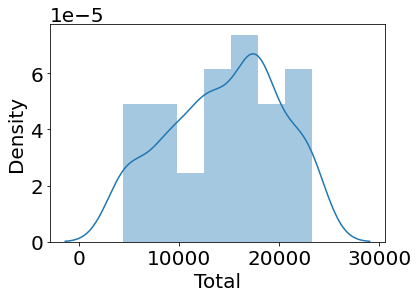

In [28]:
sns.distplot(bici['Total'])

Stampiamo ora due parametri chiave dell’analisi statistica, l’asimmetria (skewness) e la curtosi (Kurtosis).

L’asimmetria rappresenta il grado di distorsione dalla curva a campana simmetrica. In altre parole, permette di misurare la mancanza di simmetria nella distribuzione dei dati. Una distribuzione simmetrica avrà un’asimmetria pari a 0. Al contrario:

- Se l’asimmetria è compresa tra -0,5 e 0,5, i dati sono abbastanza simmetrici.
- Se l’asimmetria è compresa tra -1 e -0,5  o tra 0,5 e 1, i dati sono moderatamente distorti.
- Se l’asimmetria è inferiore a -1 o maggiore di 1, i dati sono fortemente distorti.

La curtosi riguarda invece le code della distribuzione, non il picco o la piattezza. È usata per descrivere i valori estremi in un verso rispetto all’altro della coda. Anch’essa individua i valori anomali presenti nella distribuzione.

La curtosi viene in genere confrontata con quella di una distribuzione normale. A seconda del modo in cui viene calcolata, una distribuzione normale standard può assumere curtosi pari a 3 o a 0.

Pandas considera la curtosi di una distribuzione normale pari a 0

In [29]:
print('Skewness: %f' % bici['Total'].skew())
print('Kurtosis: %f' % bici['Total'].kurt())

Skewness: -0.242981
Kurtosis: -0.907534


Creiamo ora una nuova colonna per la temperatura media sommando la più alta e la più bassa temperatura e poi dividiamo per 2 e poi valutiamo la relazione lineare tra la temperatura media e il numero dei ciclisti totali:

c:\users\rg300\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


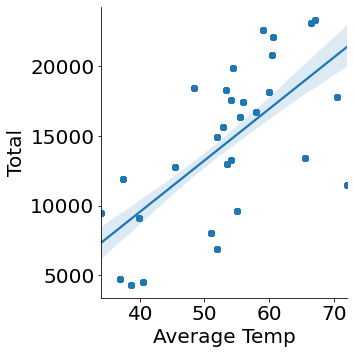

In [30]:
bici['Average Temp']=(bici['High Temp (°F)']+bici['Low Temp (°F)'])/2
sns.lmplot('Average Temp','Total',data=bici)

Sembrerebbe che la linea così disegnata non rappresenti correttamente tutti i vari punti. La relazione lineare non è molto adatta a rappresentare la relazione tra temperatura media e numero di ciclisti.

## Modello di regressione di Poisson

Siccome il numero di ciclisti è una variabile di conteggio, proviamo a creare il modello di regressione di Poisson.

Come prima cosa associamo alla variabile di input X la temperatura media e alla variabile di risposta il numero delle bici (si ricorda che un modello di regressione di Poisson, per essere efficace, deve avere la variabile di risposta che segua una distribuzione di Poisson).

La funzione add_constant della libreria Statmodels serve per aggiungere l’intercetta al modello (che chiamerà const), altrimenti non inclusa.

Successivamente creiamo il modello tramite la classe GLM e avvalendoci di una funzione di collegamento di poisson (link function).

In [31]:
X=bici['Average Temp']
y=bici['Total']
X=sm.add_constant(X)
model=sm.GLM(y,X,family=sm.families.Poisson()).fit()
bici['reg_fit']=model.fittedvalues
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4827e+05
Date:                Wed, 13 Jan 2021   Deviance:                   2.9417e+05
Time:                        20:45:17   Pearson chi2:                 2.71e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.1461      0.003   2390.129   

Il modello così creato tramite la funzione di collegamento logaritmica è semplice perché:

- Ha analizzato 210 osservazioni (che sono i dati del file);
- Ha un grado di libertà;
- Ha trovato il valore dei coefficienti dopo 4 iterazioni.

Possiamo scrivere quindi l’equazione del modello (con E si va ad indicare il valore dei residui):

$y = e^{(8,1461 + 0,0263 x + E)}$

Volendo rappresentare quanto sopra in un grafico, si può eseguire il seguente script.

c:\users\rg300\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


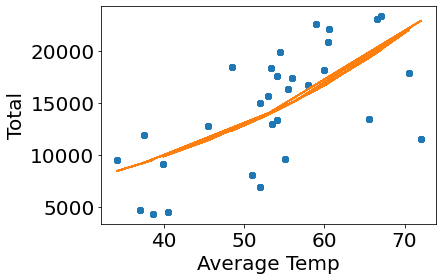

In [32]:
sns.regplot(bici['Average Temp'], bici['Total'], fit_reg=False)
plt.plot(bici['Average Temp'], bici['reg_fit'])

La regressione di Poisson può essere utile nelle situazioni in cui si voglia prevedere variabili di conteggio, come il numero di decessi in un giorno, il numero di terremoti in un paese sismico.

Importante è definire una regione, solitamente un periodo temporale, e che la variabile di risposta (un conteggio) segua la distribuzione di Poisson.

Per il dataset analizzato, il modello di regressione creato è piuttosto semplice, ha poche iterazioni e un solo grado di libertà. Rappresenta con maggior precisione la relazione tra temperatura media e numero di ciclisti rispetto ad un modello di regressione lineare.